# Question 1


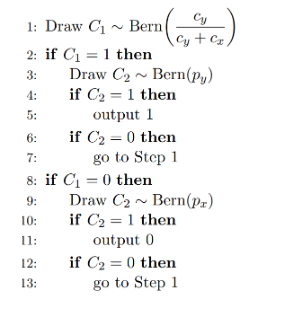

$\textbf { Part-1, Proving} $ 

$ Pr(Output=1)= \sum_{i=1}^{\infty} \ Pr(output=1 \ in \ ith \ iteration,no \ output \ in \ previous\  i-1 \ iterations) \\ $

Since the draws are independently drawn :

$ Pr(output=1 \ in \ any \ iteration) = Pr( C1=1,C2=1) = Pr(C1=1).Pr(C2=1)= \dfrac{Cy}{Cy+Cx} \times Py $

$Pr(output=0 \ in \ any \ iteration)= Pr( C1=0,C2=1)= Pr(C1=0).Pr(C2=1)= \dfrac{Cx}{Cy+Cx} \times Px \\ $ 

$Pr(No \ output \ in \ an \ iteration)= Pr( C1=1,C2=0)+Pr( C1=1,C2=0) \\ \implies Pr(C1=1).Pr(C2=0)+Pr(C1=0).Pr(C2=0) = \ \ \dfrac{Cx.(1-Px)+Cy.(1-Py)}{Cy+Cx} \\ $


$\sum_{i=1}^{\infty} \ Pr(output=1 \ in \ ith \ iteration  , \ no \ output \ in \ previous \ i-1 \ iterations)= \dfrac{Cy.Py}{Cy+Cx}\sum_{i=1}^{\infty} (\dfrac{Cx.(1-Px)+Cy.(1-Py)}{Cy+Cx}) ^{i-1}$

 $\textbf {Probability(output=1)}$ $=\dfrac{Cy.Py}{Cy.Py+Cx.Px} \\ $ 

Similarly, Probability(output = 0)= $\sum_{i=1}^{\infty} \ Pr(output=0 \ in \ ith \ iteration  , \ no \ output \ in \ previous \ i-1 \ iterations)= \dfrac{Cx.Px}{Cy+Cx}\sum_{i=1}^{\infty} (\dfrac{Cx.(1-Px)+Cy.(1-Py)}{Cy+Cx}) ^{i-1}$

 $\textbf {Probability(output = 0)}$$=\dfrac{Cx.Px}{Cy.Py+Cx.Px} \\ \\ $

Therefore we can say that if the above algorithm is followed then we will get 1 and 0 with probabilities same as that given by : $ Bernoulli(\dfrac{Cy.Py}{Cy.Py+Cx.Px}) \\ $ 

 $\textbf {Hence proved.}$



$\textbf { Part-2, Probability distribution of number of iterations} $ 


$Pr(No \ output \ in \ an \ iteration)= \dfrac{Cx.(1-Px)+Cy.(1-Py)}{Cy+Cx}, \ from \ previous \ part, \\ $

$Pr(an \ output(0 \ or \ 1)\ is \ obtained \ in \ a \ particular \ iteration)= p= \dfrac{Cx.Px+Cy.Py}{Cy+Cx} \\ $


Clearly this is like, Geometric(p) distribution, since the iterations stop once we have an output( 0 or 1).
$ \\ $


$ Exact \ pdf \ of \ distribution \ g(x) \implies \\ $
$
\begin{array}{cc}
  \{ & 
    \begin{array}{cc}
      p(1-p)^{x-1} &  x \in \{1,2,3,4....\} \\
      0 & otherwise
    \end{array} \}
\end{array}
\\
$

$ Clearly \ if \ Random \ variable \ Y $ ~ $ g(x) \ then \ Y-1  $ ~ $ Geometric(p) \\ $

$ E(Y)= 1+ E(Geomtric(p)) \\ $

$ E(Y)= 1+ (1-p)/p \\ $

$ E(Y)= 1/p \\  \\ $

Therefore the average number of iterations to get a output is $ 1/p $



# Question 2


number of iterations on average required for getting a uniform draw from p= 2 is :1.2733
number of iterations on average required for getting a uniform draw from p= 3 is :1.8825
number of iterations on average required for getting a uniform draw from p= 4 is :3.2453
number of iterations on average required for getting a uniform draw from p= 5 is :6.0348
number of iterations on average required for getting a uniform draw from p= 6 is :12.4289


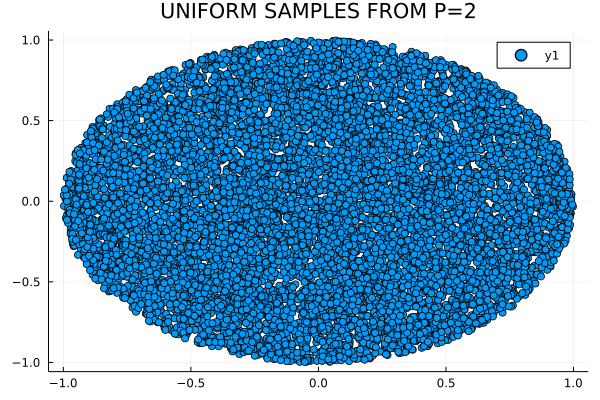

In [6]:
using Plots
using Statistics

function sample(j)
    count = 0
    nor = 0
    while (true)
        count = count + 1
        samp = 2 * rand(j) .- 1
        nor = 0
        for k = 1:j
            nor = nor + (samp[k])^2
        end
        if (nor < 1)
            return samp, count
        end
    end

end
x=zeros(m,2)
m = 10000;
counti = zeros(5, m);
# x=zeros[1,m];
# y=zeros[1,m];
for j=2:6
    draw=zeros(m,j)
 for i=1:m
  info = sample(j)     
  draw[i,:] =  info[1]
  counti[j-1,i]=info[2]
 end
    if(j==2)
        x=draw
    end
   print("number of iterations on average required for getting a uniform draw from p= ",j," is :",mean(counti[j-1,:]),"\n")
end
scatter(x[:,1],x[:,2],title="UNIFORM SAMPLES FROM P=2")




We observe as p increases the average number of attempts to get a uniform draw for the given pdf increases.

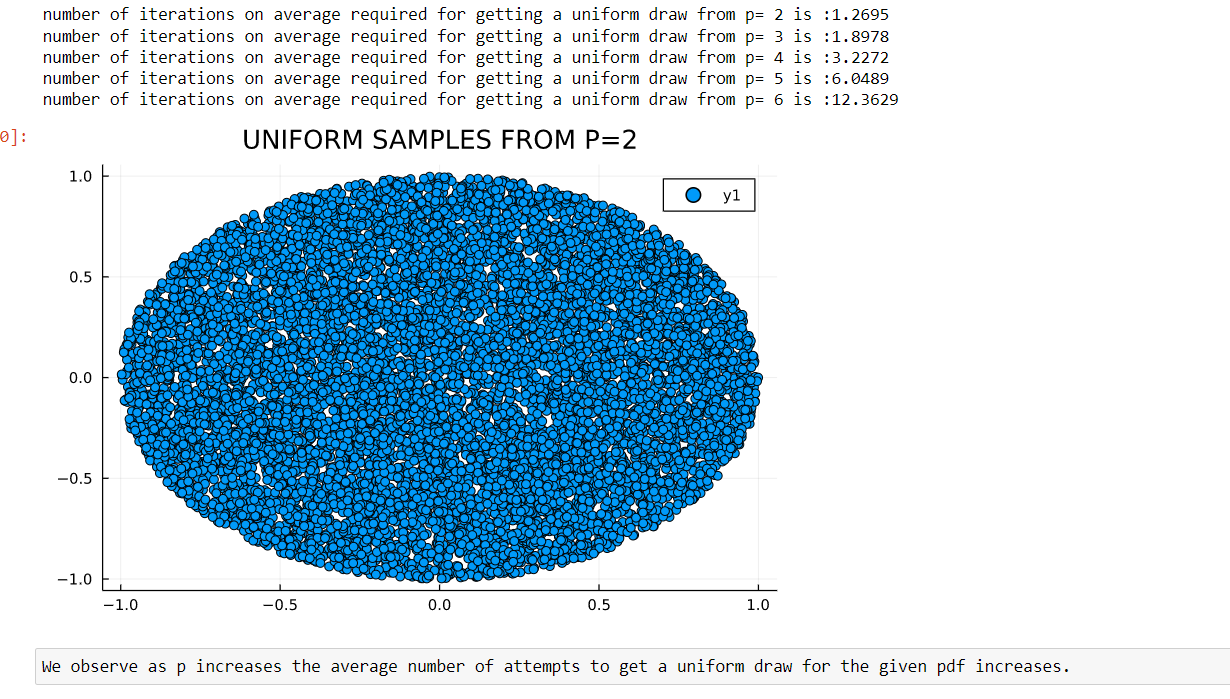


# Working of Algorithm

Accept-reject algorithm for drawing uniform sample from a disc, as discussed on page 4 and 5 of week 3 lecture 7 at https://dvats.github.io/teaching/MTH511 was simply extended to use for uniform p-dimensional hypercube, by taking 
1) g(x)=$ (1/2^p)*I( -1<x1<1,-1<x2<1...-1<xp<1) $. 
2) We get the similar condition  U< $ I(\norm(x)<1)$, where x is p dimensional random draw from p dimensional uniform hypercube.
3) Above condition simply means that if we take p random draws (x1,x2,x3....xp), each from U(-1,1) and their norm is less than 1, then those p random draws are accepted as the proposal.

# Question 3


Mean of sample for a= 1 is : -0.004303219296898507,  Variance of sample for a= 1 is : 0.2928530388693119
Density Mean for a= 1 is : 0.0,  Density Variance for a= 1 is : 0.29112509477279314

Mean of sample for a= 4 is : 0.013057713224560535,  Variance of sample for a= 1 is : 0.9978669145243432
Density Mean for a= 4 is : 0.0,  Density Variance for a= 1 is : 0.9989292903724738



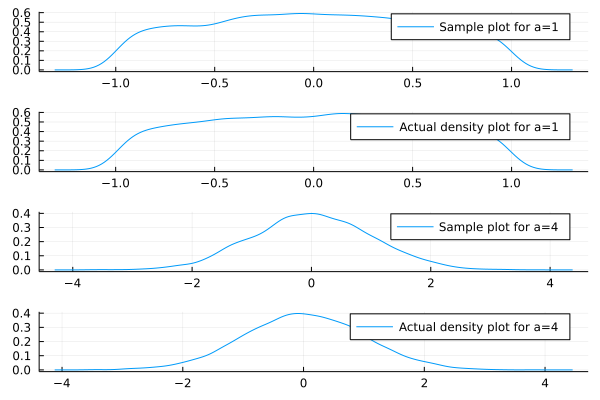

In [7]:
using StatsPlots
using Statistics
using Distributions

function areject(a)

    while (true)
        u = rand()
        d = Normal()
        prop = rand(d)

        if ( prop<a && prop>-a)
            return prop
        end
    end

end

##Calling m samples of custom Truncated normal distribution
m=10000;
X = zeros(1, m)
X1=zeros(1,m)
for i = 1:m
    X[i] = areject(1)
    X1[i]=areject(4)
end
d = TruncatedNormal(0, 1, -1, 1)
d1 = TruncatedNormal(0, 1, -4, 4)
Y = rand(d, m)
Y1=rand(d1,m)
Z = [X[1:m], Y[1:m],X1[1:m],Y1[1:m]];
println("Mean of sample for a= ",1," is : ", mean(X), ",  Variance of sample for a= ",1," is : ", var(X));
println("Density Mean for a= ",1," is : ", mean(d), ",  Density Variance for a= ",1," is : ", var(d),"\n");
println("Mean of sample for a= ",4," is : ", mean(X1), ",  Variance of sample for a= ",1," is : ", var(X1));
println("Density Mean for a= ",4," is : ", mean(d1), ",  Density Variance for a= ",1," is : ", var(d1),"\n");
density(Z, layout=(4, 1), label=["Sample plot for a=1" "Actual density plot for a=1" "Sample plot for a=4" "Actual density plot for a=4"], plot=true, show=true)



For a=4 the truncated standard normal density plot has more sharp peak compared to the probability density plot for a=1

# Plots and observation


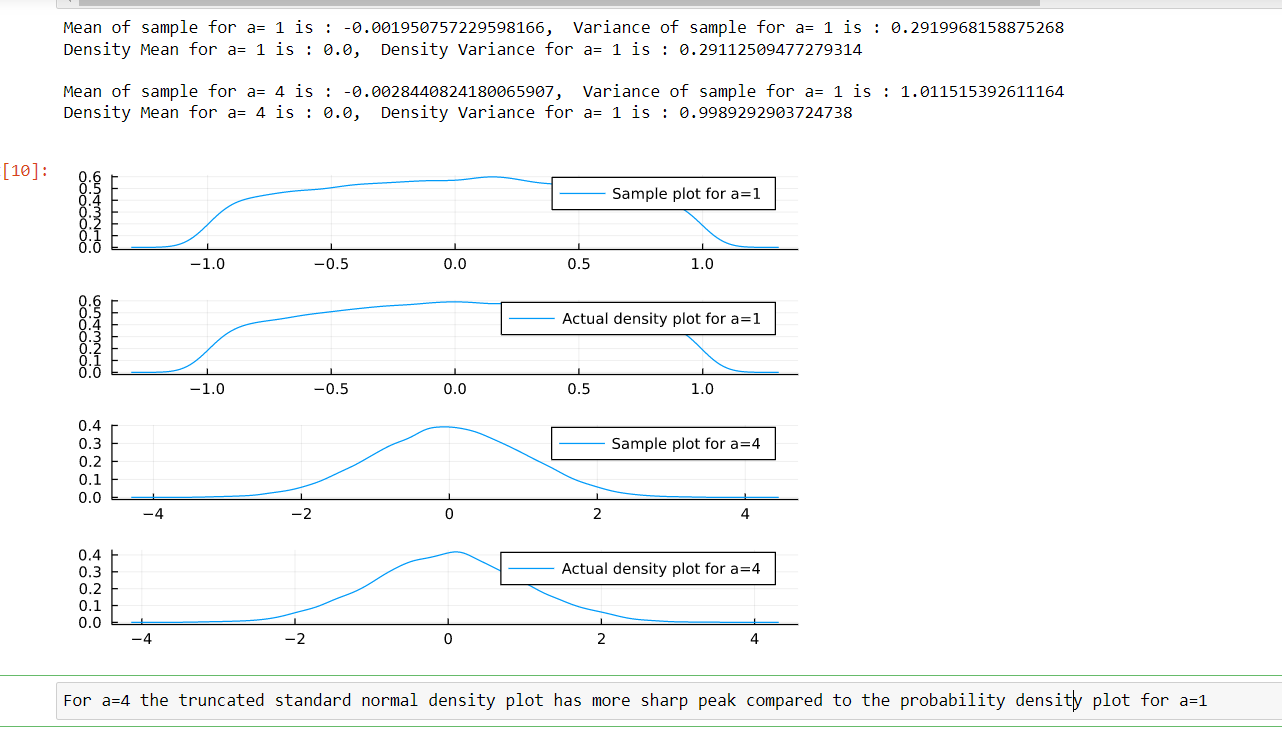

# WORKING OF ALGORITHM

Accept-reject algorithm as discussed in week 3 lecture 7 at https://dvats.github.io/teaching/MTH511 was used.
1. f(x)/g(x) , were g(x) is the pdf of N(0,1) distribution was found to be $ I(-a<x<a)/(\phi(a)-\phi(-a)) $.
2. This ratio is less than $ c= 1/(\phi(a)-\phi(-a)) $
3. f(x)/(g(x)*c)= I(-a<x<a), here x is the random proposal from N(0,1)
4. For any U~U(0,1) , U< f(x)/(g(x)*c) implies U< I(-a<x<a) , which is true whenever the random proposal from the standard normal distrubution lies between (-a,a)
5. We have checked  x~N(0,1) , whether it lies between (-a,a), if it lies we have accepted the proposal and returned it.
